In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [4]:
df.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Model building

In [6]:
x = df.iloc[:,1:]
y = df['Taxable.Income']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#Evaluating regressor

In [8]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [9]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: -0.24991416727855786
MSE: 864423998.3671508
RMSE: 29401.088387458563


In [ ]:
#Visualize the rf

In [10]:
len(rf.estimators_)

100

In [11]:
rf.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=2033449418)

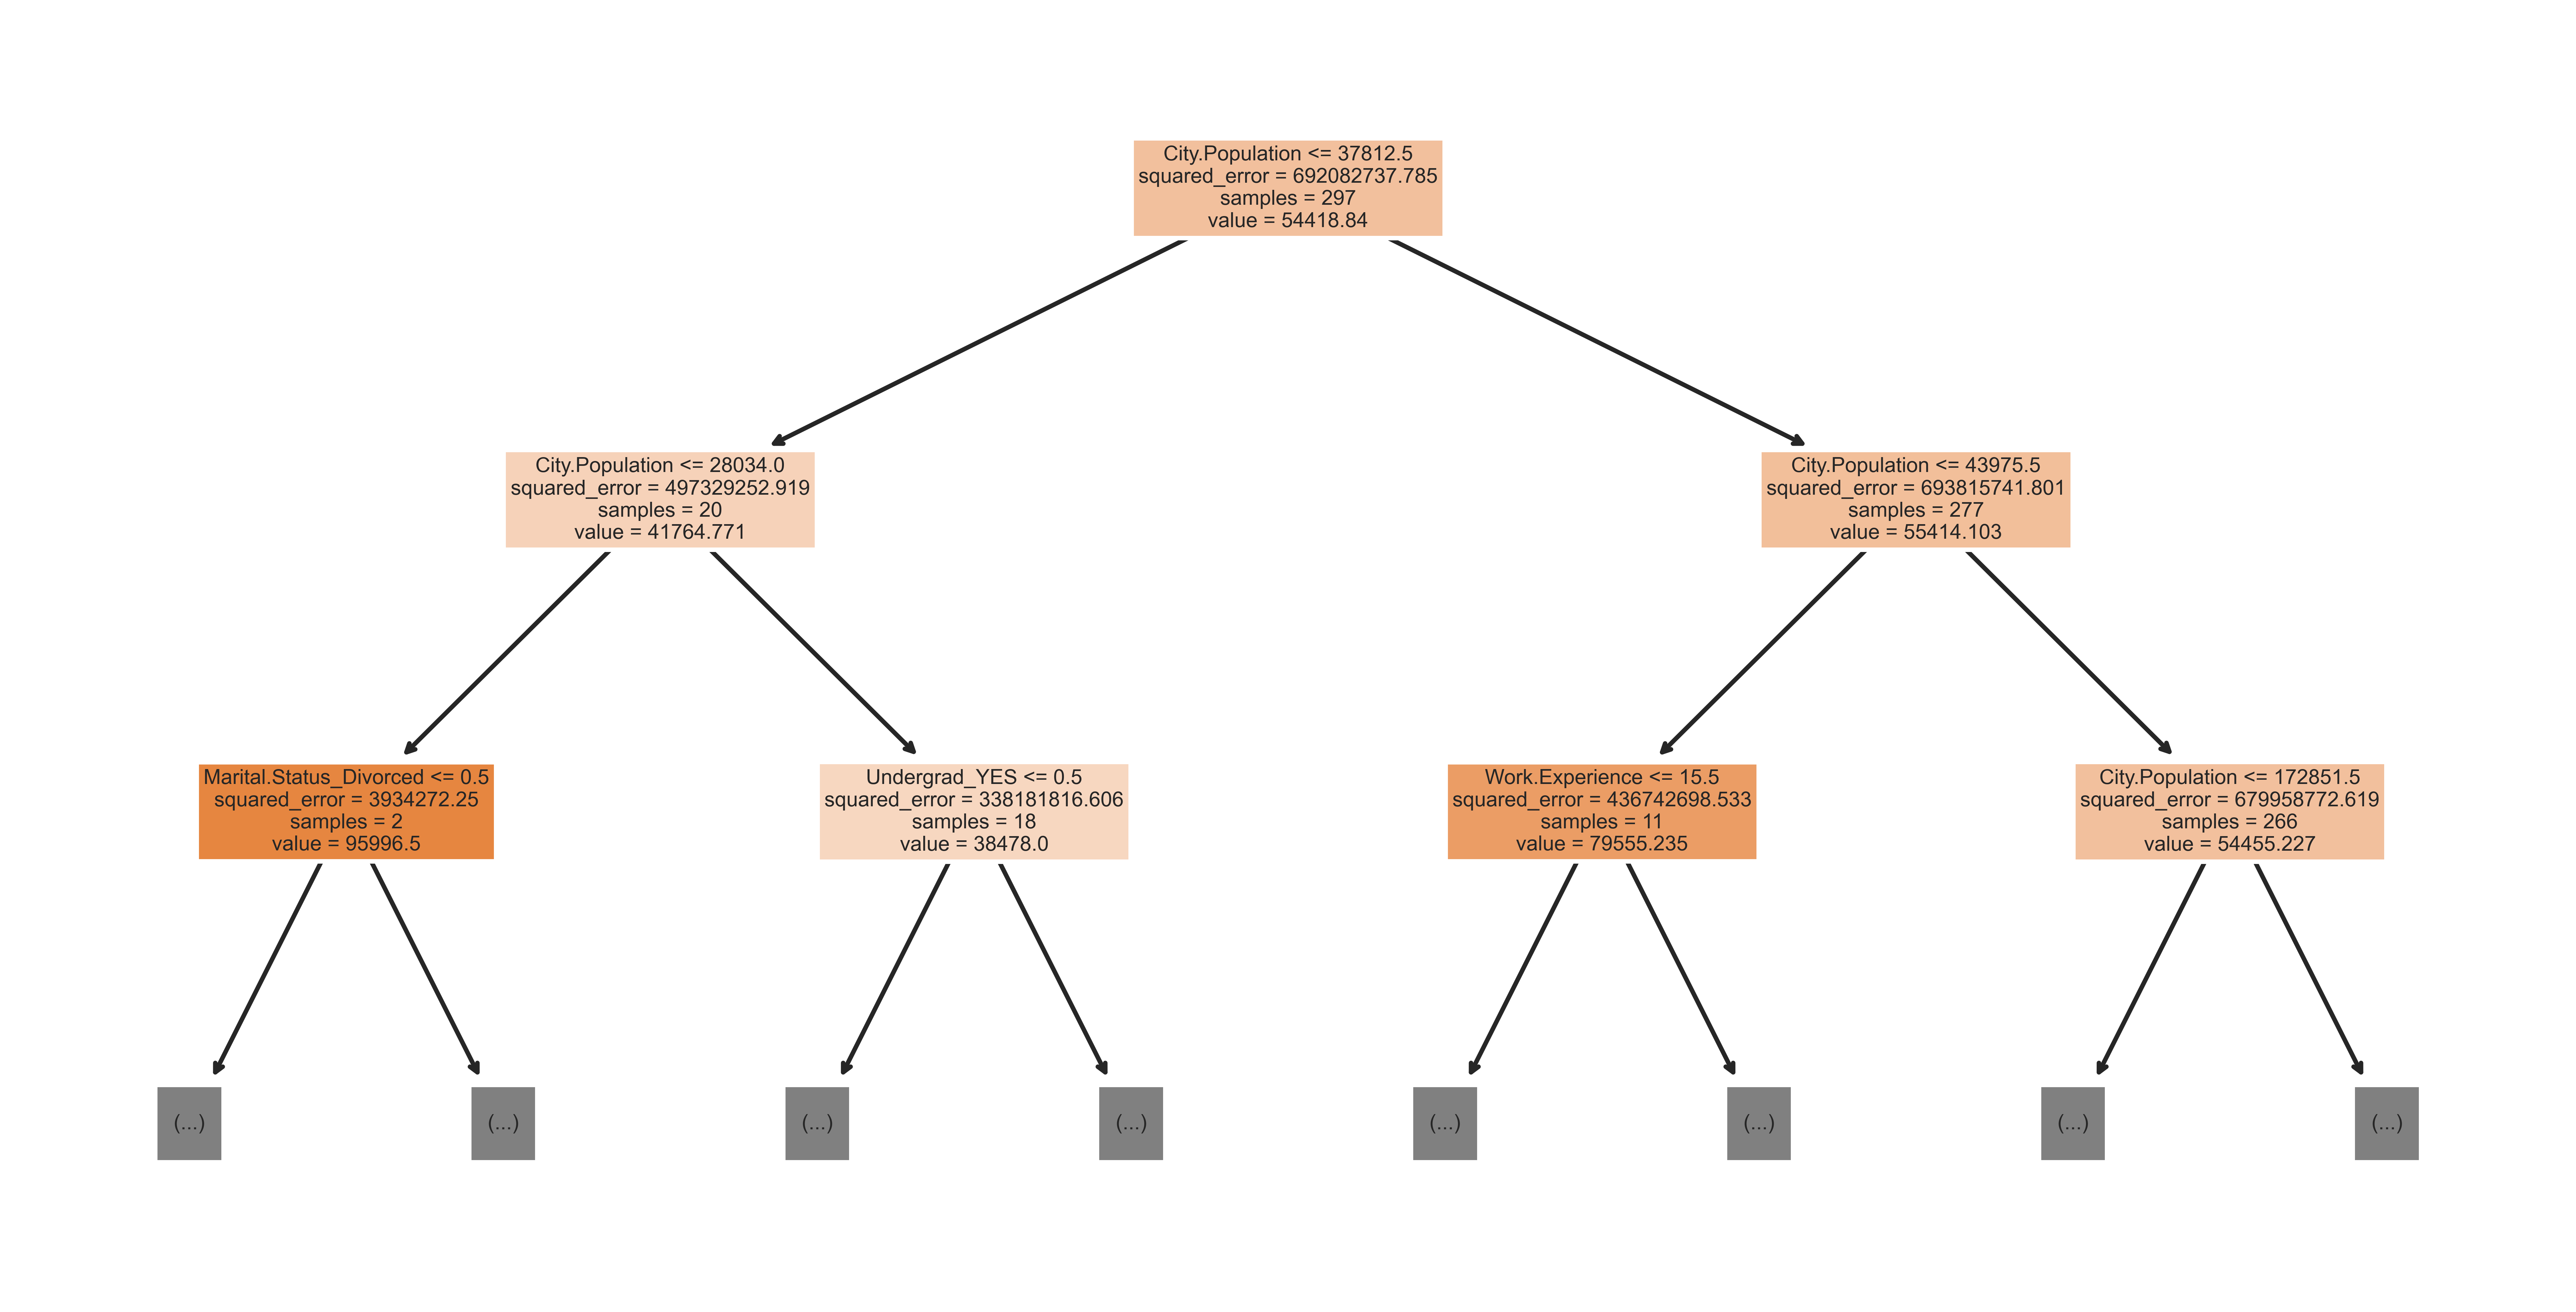

In [12]:
tree.plot_tree(rf.estimators_[0], feature_names=list(x.columns),
              filled=True, max_depth=2)
plt.show()

In [ ]:
# Classification

In [13]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [14]:
df.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

<Axes: xlabel='Taxable.Income', ylabel='count'>

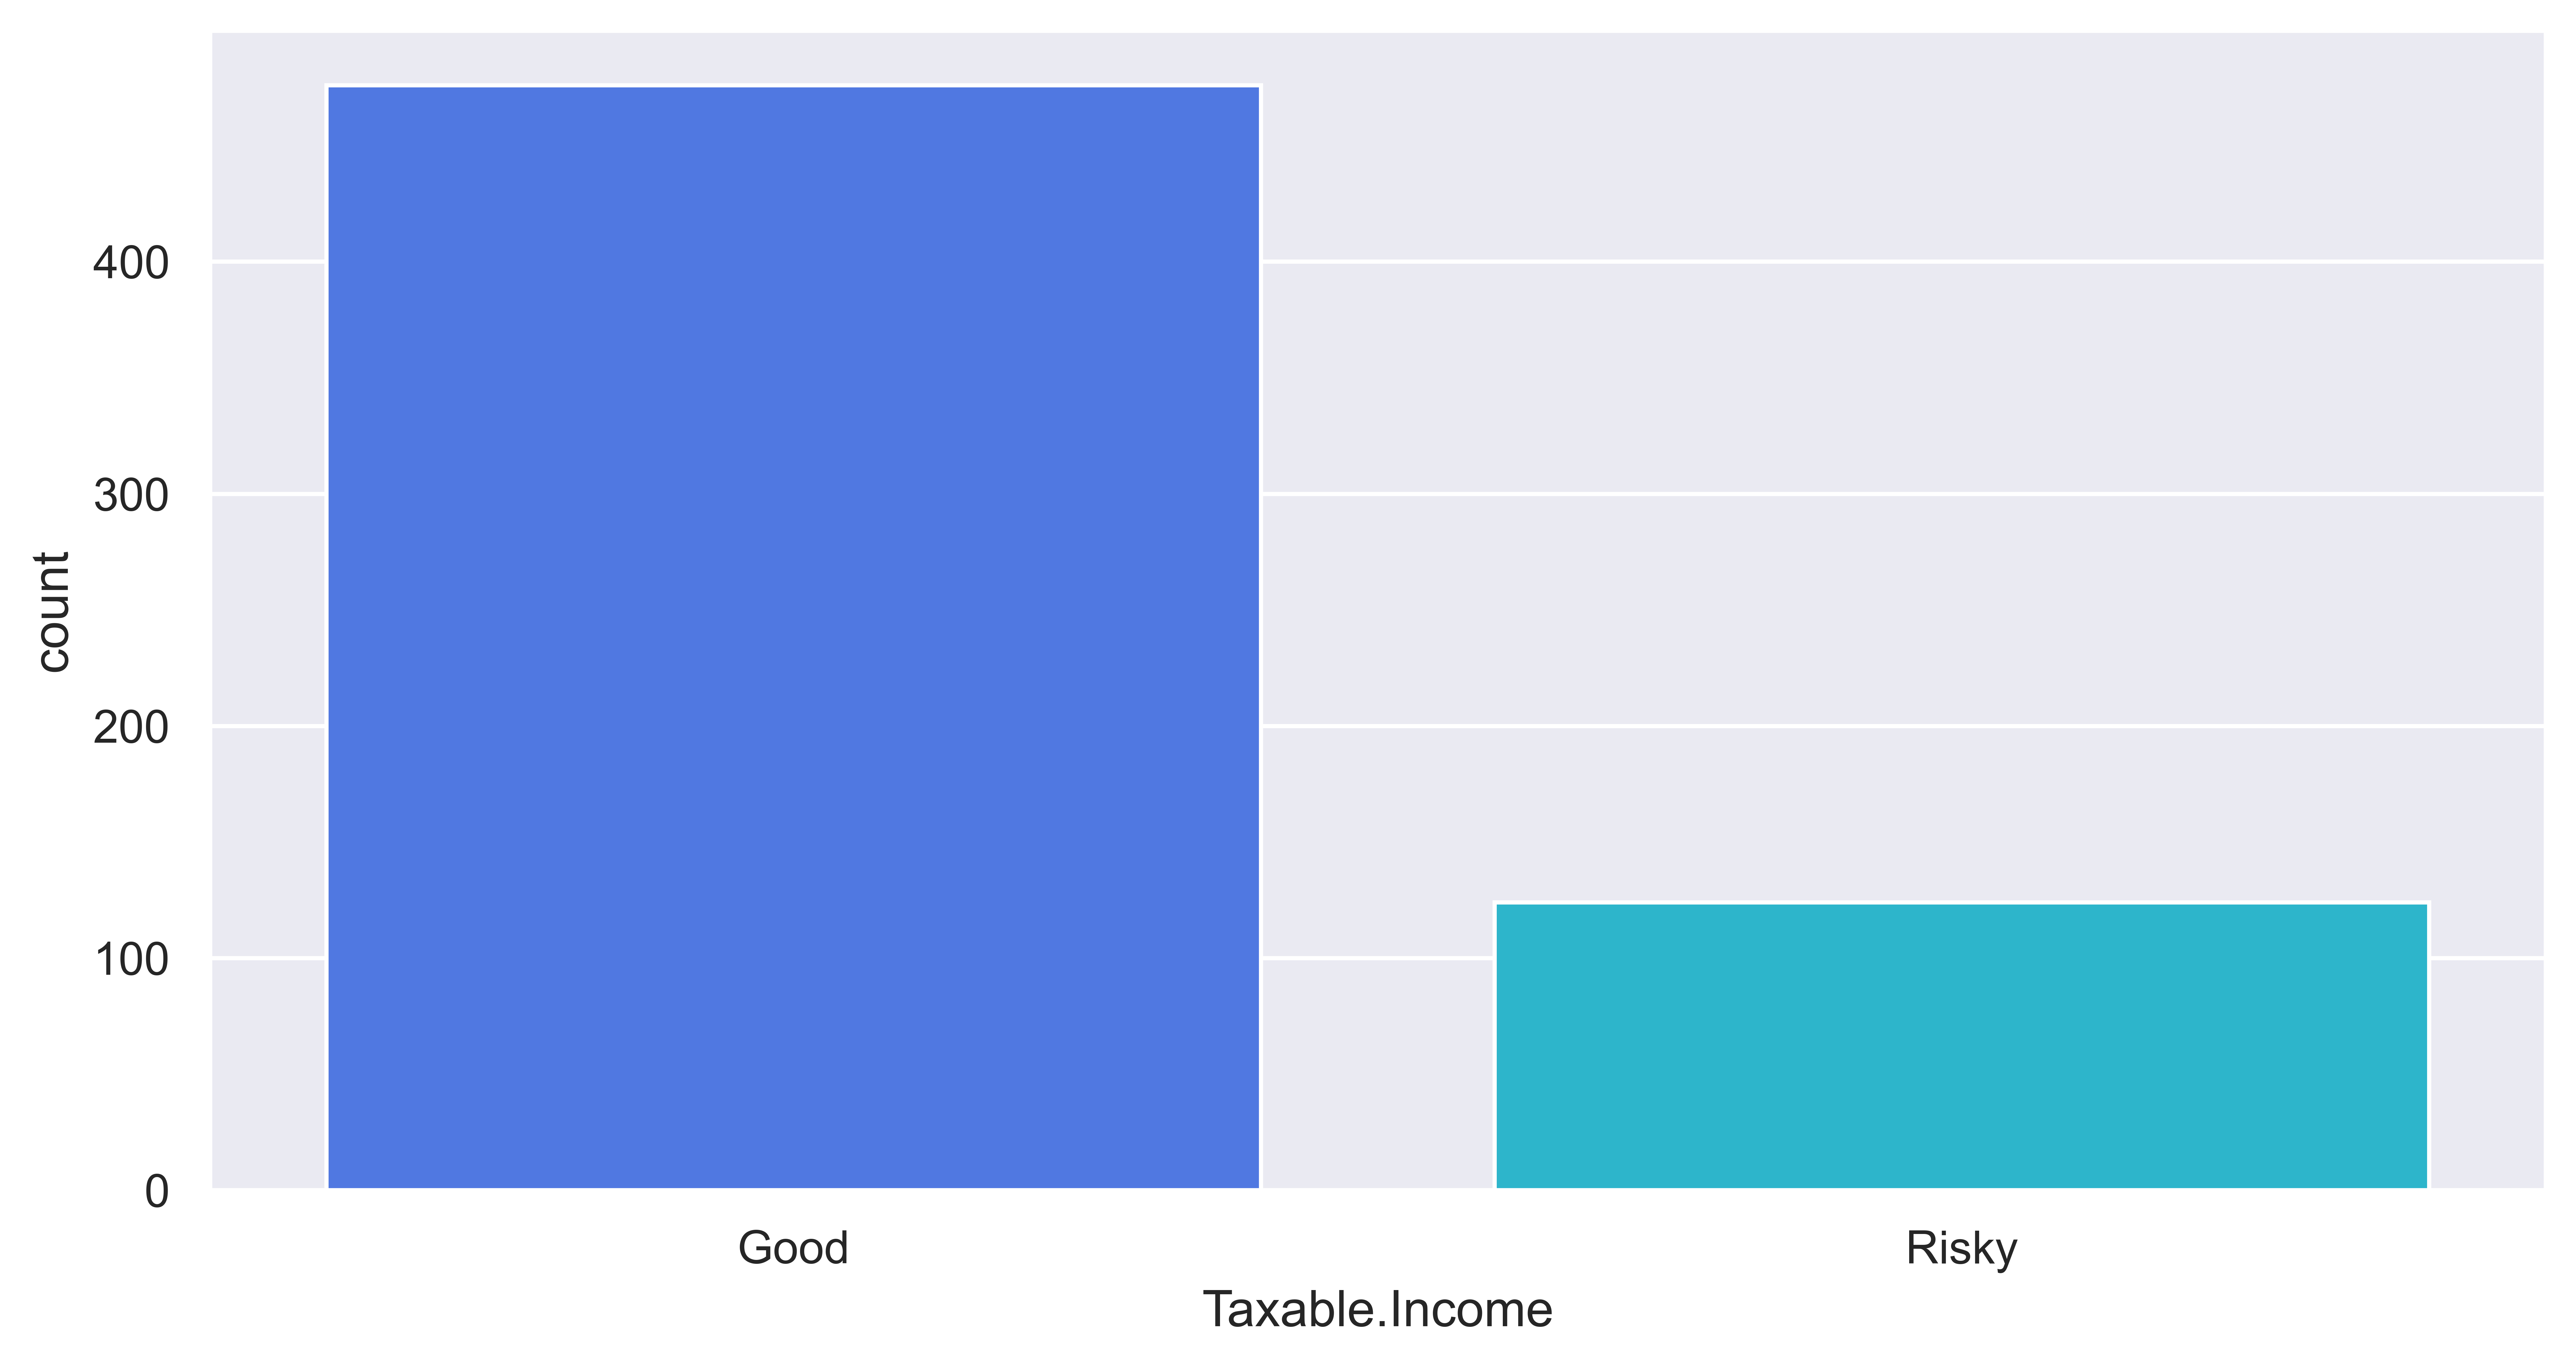

In [16]:
sns.countplot(x=df['Taxable.Income'])

In [ ]:
#Evaluate model

In [17]:
x = df.iloc[:,1:]
y = df['Taxable.Income']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [20]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        Good       0.80      0.93      0.86        97
       Risky       0.12      0.04      0.06        23

    accuracy                           0.76       120
   macro avg       0.46      0.49      0.46       120
weighted avg       0.67      0.76      0.71       120



In [22]:
rfc.score(xtrain,ytrain), rfc.score(xtest,ytest)

(1.0, 0.7666666666666667)

In [ ]:
# Hyperparameter tuning


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {
    'n_estimators' : [10,50,100,150,200,250],
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' :[3,5,7,9,11,13,15]
}

In [25]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,
                   verbose=1)

In [26]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [10, 50, 100, 150, 200, 250]},
             verbose=1)

In [27]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}

In [28]:
rfc = RandomForestClassifier(criterion='gini',max_depth=3,n_estimators=10)
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [29]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        Good       0.81      1.00      0.89        97
       Risky       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



In [30]:
rfc.score(xtrain,ytrain), rfc.score(xtest,ytest)

(0.7895833333333333, 0.8083333333333333)